In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
from xgboost import  XGBClassifier
from sklearn import preprocessing
import seaborn as sns

In [ ]:
df=pd.read_csv('/content/ML Project 1 Dataset.csv')
df.head()

,APP_ID,CIBIL_SCORE_VALUE,NEW_CUST,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,SEX,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
0,12345,0,YES,1,0,31,F,3,0,0,1,4,2,36,0,0.767104,12,0
1,12347,0,NO,1,1,40,F,2,1,1,0,1,1,12,2,0.619077,24,0
2,12349,0,YES,1,0,27,F,3,0,0,1,2,2,72,0,0.848949,36,0
3,12351,2,NO,1,1,33,M,2,0,1,0,2,1,120,1,0.515646,12,0
4,12353,2,NO,1,1,29,F,1,0,1,1,2,1,24,2,0.614123,24,1


In [ ]:
#df=df.drop('APP_ID',axis=1)
#df=df.drop(' SEX  ',axis=1)
#df=df.drop('AGE',axis=1)
#df=df.drop('  MON_IN_OCC ',axis=1)

In [ ]:
df.isnull().sum()

APP_ID                 0
 CIBIL_SCORE_VALUE     0
NEW_CUST               0
CUS_CATGCODE           0
 EMPLOYMENT_TYPE       0
AGE                    0
 SEX                   0
 NO_OF_DEPENDENTS      0
 MARITAL               0
 EDU_QUA               0
  P_RESTYPE            0
 P_CATEGORY            0
 EMPLOYEE_TYPE         0
  MON_IN_OCC           0
 INCOM_EXP_GMI         0
LTV                    0
 TENURE                0
STATUS                 0
dtype: int64

In [ ]:
df.dtypes

APP_ID                   int64
 CIBIL_SCORE_VALUE       int64
NEW_CUST                object
CUS_CATGCODE             int64
 EMPLOYMENT_TYPE         int64
AGE                      int64
 SEX                    object
 NO_OF_DEPENDENTS        int64
 MARITAL                 int64
 EDU_QUA                 int64
  P_RESTYPE              int64
 P_CATEGORY              int64
 EMPLOYEE_TYPE           int64
  MON_IN_OCC             int64
 INCOM_EXP_GMI           int64
LTV                    float64
 TENURE                  int64
STATUS                   int64
dtype: object

In [ ]:
df.columns

Index(['APP_ID', ' CIBIL_SCORE_VALUE ', 'NEW_CUST', 'CUS_CATGCODE ',
       ' EMPLOYMENT_TYPE ', 'AGE', ' SEX  ', ' NO_OF_DEPENDENTS ', ' MARITAL ',
       ' EDU_QUA', '  P_RESTYPE ', ' P_CATEGORY ', ' EMPLOYEE_TYPE ',
       '  MON_IN_OCC ', ' INCOM_EXP_GMI ', 'LTV', ' TENURE ', 'STATUS'],
      dtype='object')

In [ ]:
df['NEW_CUST']=df['NEW_CUST'].replace('YES',1)
df['NEW_CUST']=df['NEW_CUST'].replace('NO',0)

In [ ]:
df.head()

,APP_ID,CIBIL_SCORE_VALUE,NEW_CUST,CUS_CATGCODE,EMPLOYMENT_TYPE,AGE,SEX,NO_OF_DEPENDENTS,MARITAL,EDU_QUA,P_RESTYPE,P_CATEGORY,EMPLOYEE_TYPE,MON_IN_OCC,INCOM_EXP_GMI,LTV,TENURE,STATUS
0,12345,0,1,1,0,31,F,3,0,0,1,4,2,36,0,0.767104,12,0
1,12347,0,0,1,1,40,F,2,1,1,0,1,1,12,2,0.619077,24,0
2,12349,0,1,1,0,27,F,3,0,0,1,2,2,72,0,0.848949,36,0
3,12351,2,0,1,1,33,M,2,0,1,0,2,1,120,1,0.515646,12,0
4,12353,2,0,1,1,29,F,1,0,1,1,2,1,24,2,0.614123,24,1


In [ ]:
df['LTV']=df['LTV']*10
df['  MON_IN_OCC ']=df['  MON_IN_OCC ']/10
df['AGE']=df['AGE']/10

In [ ]:
df.dtypes

APP_ID                   int64
 CIBIL_SCORE_VALUE       int64
NEW_CUST                 int64
CUS_CATGCODE             int64
 EMPLOYMENT_TYPE         int64
AGE                    float64
 SEX                    object
 NO_OF_DEPENDENTS        int64
 MARITAL                 int64
 EDU_QUA                 int64
  P_RESTYPE              int64
 P_CATEGORY              int64
 EMPLOYEE_TYPE           int64
  MON_IN_OCC           float64
 INCOM_EXP_GMI           int64
LTV                    float64
 TENURE                  int64
STATUS                   int64
dtype: object

In [ ]:
df['LTV']=df['LTV'].astype(int)
df['  MON_IN_OCC ']=df['  MON_IN_OCC '].astype(int)
df['AGE']=df['AGE'].astype(int)

In [ ]:
label_encoder = preprocessing.LabelEncoder()
df['LTV']= label_encoder.fit_transform(df['LTV'])
df['  MON_IN_OCC ']= label_encoder.fit_transform(df['  MON_IN_OCC '])
df['AGE']= label_encoder.fit_transform(df['AGE'])
df['STATUS']= label_encoder.fit_transform(df['STATUS'])

In [ ]:
df=df.drop('APP_ID',axis=1)
df=df.drop(' SEX  ',axis=1)

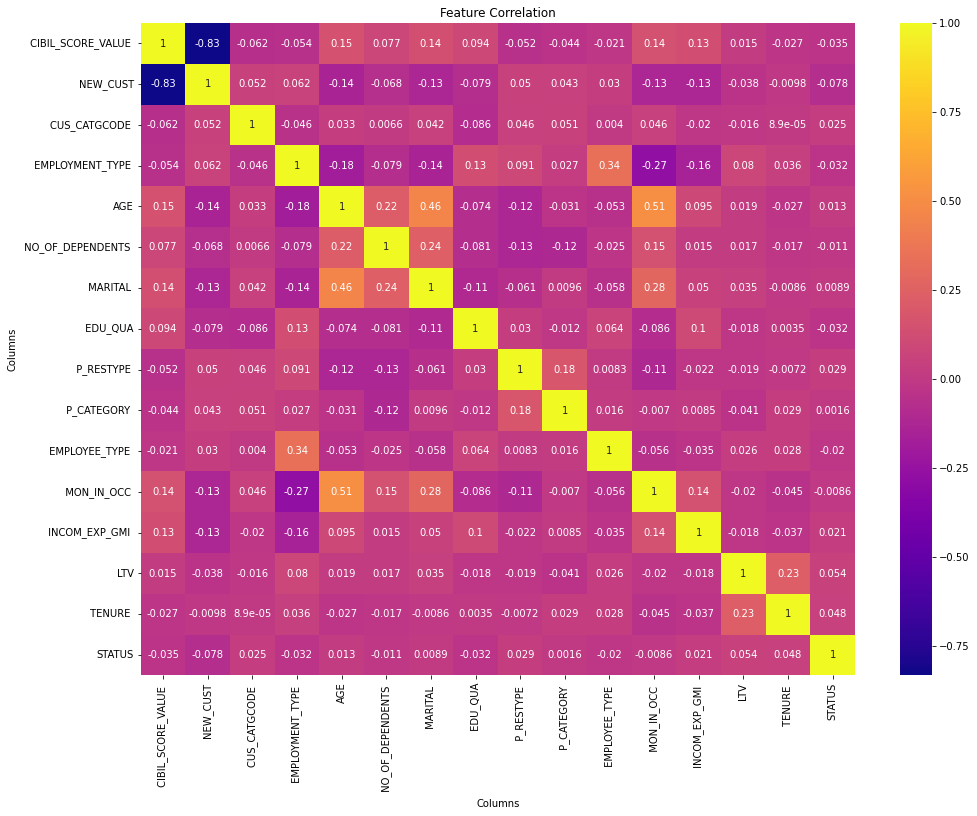

In [ ]:
fig, ax = plt.subplots(figsize=(16,12))
sns.heatmap(df.corr(), annot=True, ax=ax,cmap='plasma').set(
    title = 'Feature Correlation', xlabel = 'Columns', ylabel = 'Columns')
plt.show()

In [ ]:
X = df.drop('STATUS',1)
y = df.STATUS

<ipython-input-16-e2b2e5035020>:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  X = df.drop('STATUS',1)


In [ ]:
#X = pd.get_dummies(X)
#train=pd.get_dummies(df)
#test=pd.get_dummies(df)

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test,y_train,y_test = train_test_split(X,y, test_size=0.3)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
model = LogisticRegression()
model.fit(X_train, y_train)
LogisticRegression()

/usr/local/lib/python3.8/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [ ]:
pred_cv = model.predict(X_test)
accuracy_score(y_test,pred_cv)


0.6378446115288221